In [10]:
import warnings
import pandas as pd
warnings.simplefilter('ignore')

In [11]:
# Load csv files into dataframe
train = pd.read_csv("Resources/train.csv")
test = pd.read_csv("Resources/test.csv")

In [12]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [13]:
# Replace alphabets and '/' from the Cabin values
train['Cabin'] = train['Cabin'].str.replace('[^0-9]','')
test['Cabin'] = test['Cabin'].str.replace('[^0-9]','')
test.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,3,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,4,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [14]:
# Count each values in Destination and Homeplanet
print(train.Destination.value_counts(['TRAPPIST-1e']))
print(train.HomePlanet.value_counts(['TRAPPIST-1e']))

TRAPPIST-1e      0.694983
55 Cancri e      0.211491
PSO J318.5-22    0.093526
Name: Destination, dtype: float64
Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: HomePlanet, dtype: float64


In [15]:
# Replace categorical Home planet values with 0 1 2 3
train.HomePlanet.replace({'Europa':2,'Earth':3,'Mars':1,
                             None:3}, inplace = True)

# Replace categorical destination values with 0 1 2 3
# train.Destination.replace({'TRAPPIST-1e':3, 'PSO J318.5-22':1, 
#                               '55 Cancri e':2,None:3}, inplace = True)

age_mean = train.Age.mean()
train.Age.fillna(age_mean, inplace = True)

# Fill boolean values with 1, 0 in train_df features
train.CryoSleep.replace({True:1,False:0}, inplace = True)
train.Transported.replace({True:1,False:0}, inplace = True)

train.dropna(inplace = True)
# train.fillna(0,inplace = True)


In [16]:
# Dropping features VIP as it has lesser dependency on target variable
train.drop(columns=['Name','PassengerId','VIP', 'Destination'], inplace = True)
test.drop(columns=['Name','PassengerId','VIP', 'Destination'], inplace = True)

In [17]:
# Fill boolean values with 1, 0 in train_df features
test.CryoSleep.replace({True:1,False:0}, inplace = True)

# Replace categorical destination values with 0 1 2 3
# test.Destination.replace({'TRAPPIST-1e':3, 'PSO J318.5-22':1, 
#                               '55 Cancri e':2,None:3}, inplace = True)

# Replace categorical Home planet values with 1 2 3
test.HomePlanet.replace({'Europa':2,'Earth':3,'Mars':1,
                             None:3}, inplace = True)
test_age_mean = test.Age.mean()
test.Age.fillna(test_age_mean, inplace = True)
test.dropna(inplace = True)
# test.fillna(0, inplace = True)
test.head()

,HomePlanet,CryoSleep,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,3,1.0,3,27.0,0.0,0.0,0.0,0.0,0.0
1,3,0.0,4,19.0,0.0,9.0,0.0,2823.0,0.0
2,2,1.0,0,31.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,1,38.0,0.0,6652.0,0.0,181.0,585.0
4,3,0.0,5,20.0,10.0,0.0,635.0,0.0,0.0


In [18]:
# Split dependent and independent variable
X = train.loc[:, train.columns !='Transported']
y = train.loc[:, train.columns =='Transported']

In [19]:
# verify shape of train and test
print(X.shape)
print(test.shape)
print(test.isna().sum())

(6921, 9)
(3645, 9)
HomePlanet      0
CryoSleep       0
Cabin           0
Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64


In [20]:
# split X, y using train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.50, random_state=100)

In [21]:
# Check distribution of labels
y_train.value_counts(normalize = True)

Transported
0              0.500578
1              0.499422
dtype: float64

In [22]:
from sklearn.preprocessing import StandardScaler
 
ss = StandardScaler()

# Fit and transform the data
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

## Logistic Regression Model

In [23]:
# Scaled Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='saga')
lr.fit(X_train, y_train)

# Model Accuracy
print(f"Training Data Score: {lr.score(X_train, y_train)}")
print(f"Testing Data Score: {lr.score(X_test, y_test)}")
y_pred = lr.predict(test)

Training Data Score: 0.7884393063583816
Testing Data Score: 0.7850332273909275


## Random Forest Classifier

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Train and fit the model
rfc = RandomForestClassifier(n_estimators = 100,max_features = 'auto',
                             min_samples_split=9, random_state=90,min_samples_leaf=13)

rfc.fit(X_train, y_train)

importance = rfc.feature_importances_

print(f'Training score: {rfc.score(X_train, y_train)}')
print(f'Testing score: {rfc.score(X_test, y_test)}')
y_pred_rfc  =  rfc.predict(test)
y_pred_rfc

Training score: 0.8338150289017341
Testing score: 0.7960127130887027


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

Feature: 0, Score: 0.08464
Feature: 1, Score: 0.21739
Feature: 2, Score: 0.08001
Feature: 3, Score: 0.07066
Feature: 4, Score: 0.12682
Feature: 5, Score: 0.10923
Feature: 6, Score: 0.06747
Feature: 7, Score: 0.12060
Feature: 8, Score: 0.12317


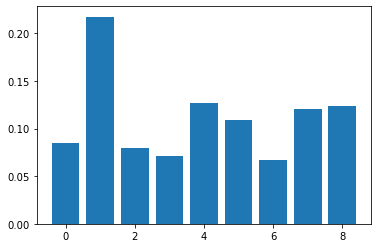

In [26]:
from matplotlib import pyplot as plt
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
# abc = AdaBoostClassifier(random_state=19, n_estimators=76, 
#                          base_estimator=DecisionTreeClassifier(
#                              max_depth=2,max_features = 'auto'))

abc = AdaBoostClassifier(random_state=19, n_estimators=105, 
                         base_estimator=DecisionTreeClassifier(
                             max_depth=2,max_features = 'auto', min_samples_leaf=12))
abc.fit(X_train, y_train)

# Model accuracy
print(f'Training Score: {abc.score(X_train, y_train)}')
print(f'Testing Score: {abc.score(X_test, y_test)}')
y_pred_ada  =  abc.predict(test)
y_pred_ada

Training Score: 0.8453757225433526
Testing Score: 0.777520947702976


array([1, 0, 1, ..., 1, 1, 1], dtype=int64)

## Scaled logistic Regression Model

In [28]:
# Scaled Logistic Regression Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced', solver='saga')
lr.fit(X_train_scaled, y_train)

# Model Accuracy
print(f"Training Data Score: {lr.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {lr.score(X_test_scaled, y_test)}")
y_pred_lr = lr.predict(test)
y_pred_lr

Training Data Score: 0.7901734104046243
Testing Data Score: 0.7792545507078878


array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Decision Tree Classifier

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Train and fit the model
dtc = DecisionTreeClassifier(max_depth=9,min_samples_leaf=15)
dtc.fit(X_train_scaled, y_train)

# Model Accuracy
print(f'Training score: {dtc.score(X_train_scaled, y_train)}')
print(f'Testing score: {dtc.score(X_test_scaled, y_test)}')
y_pred_dtc  =  dtc.predict(test)
y_pred_dtc

Training score: 0.8210982658959538
Testing score: 0.7717422710199364


array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [30]:
from sklearn.svm import SVC, SVR 
# Train and fit the model
svm_model = SVC(kernel='rbf', C=5, gamma='auto')
svm_model.fit(X_train_scaled, y_train)

# importance = svm_model.feature_importances_
# Model Accuracy
print(f"Training Data Score: {svm_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {svm_model.score(X_test_scaled, y_test)}")
y_pred_svm=svm_model.predict(test)
y_pred_svm

Training Data Score: 0.8115606936416185
Testing Data Score: 0.7890783010690552


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [34]:
# Automated Neural Network Model
import tensorflow as tf

# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation', ['relu','tanh', 'sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=4), activation=activation, input_dim=9))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 7)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=4),
            activation=activation))
    
    # Output layer
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model


In [35]:
# Import the kerastuner library
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    factor = 4,
    max_epochs=20,
    hyperband_iterations=6)

In [36]:
# # Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))
tuner.results_summary()

Trial 264 Complete [00h 00m 10s]
val_accuracy: 0.7896561622619629

Best val_accuracy So Far: 0.8009245991706848
Total elapsed time: 00h 18m 23s
INFO:tensorflow:Oracle triggered exit
Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
activation: tanh
first_units: 21
num_layers: 6
units_0: 25
units_1: 17
units_2: 13
units_3: 25
units_4: 25
units_5: 21
units_6: 21
tuner/epochs: 20
tuner/initial_epoch: 5
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 19e0ee94bba0e3d2d428434e01bbfcc6
Score: 0.8009245991706848
Trial summary
Hyperparameters:
activation: tanh
first_units: 25
num_layers: 2
units_0: 29
units_1: 21
units_2: 9
units_3: 5
units_4: 9
units_5: 17
units_6: 5
tuner/epochs: 20
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.79976886510849
Trial summary
Hyperparameters:
activation: relu
first_units: 29
num_layers: 6
units_0: 25
units_1: 5
units_2: 25
units_3: 21
units_4: 13
u